<a href="https://colab.research.google.com/github/jyotiraj-code/dissertation/blob/main/Practice%20Codes/Practice_for_the_QAOA_for_the_implementation_of_the_expectation_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Agenda:  </br>To learn about the implementation of the ZZ gate and calculating the expectation value as instructed on the notebook: Bayesian Optimizing QAOA Circuit Energy ([Link](https://quimb.readthedocs.io/en/latest/examples/ex_tn_qaoa_energy_bayesopt.html)) and then we will use the actual QFT function from Qiskit or similar other language to calculate the expectation value of the QFT in accordance with the Rzz (same as ZZ) gate and then compare their results for different range of qubits and plotting the results

In [6]:
!pip install -U git+https://github.com/jcmgray/quimb.git

%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn
import numpy as np
from math import pi

  Cloning https://github.com/jcmgray/quimb.git to /tmp/pip-req-build-5_jxoqim
  Running command git clone --filter=blob:none --quiet https://github.com/jcmgray/quimb.git /tmp/pip-req-build-5_jxoqim
  Resolved https://github.com/jcmgray/quimb.git to commit 7cd4f4af8a9b4aa94d847d698e1060a1a0a37633
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


##### Learning about the instructed notebook "Bayesing Optimization.."

In [19]:
#In the given example a quantum circuit of qubits = 54 and p = 4 (depth of 12), QAOA circuit will be optimized on a random 3-regular graph
%config InlineBackend.figure_formats = ['svg']

import quimb as qu
import quimb.tensor as qtn

#We instantiate a high quality contraction path finder from cotengra , becuase each energy term will be a unique contraction
import cotengra as ctg

#The optimizer made reusable
opt = ctg.ReusableHyperOptimizer(
    methods=['greedy'],
    reconf_opts={},
    max_repeats=32,
    max_time="rate:1e6",
    parallel=True,
    # use the following for persistently cached paths
    # directory=True,
)

We generate a random regular graph of conditions to satisfy.

In [39]:
!pip install pygraphviz --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pygraphviz
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pygraphviz)


None


{26: [30, 22, 9], 30: [26, 22, 37], 10: [43, 53, 18], 43: [10, 35, 37], 16: [47, 23, 50], 47: [16, 27, 15], 22: [26, 30, 40], 9: [17, 26, 51], 17: [9, 32, 35], 35: [44, 43, 17], 44: [35, 8, 21], 5: [39, 45, 31], 39: [5, 1, 13], 13: [28, 37, 39], 28: [13, 3, 0], 19: [41, 20, 24], 41: [19, 53, 12], 37: [13, 43, 30], 2: [34, 49, 14], 34: [2, 4, 15], 29: [36, 25, 31], 36: [29, 6, 24], 46: [52, 7, 33], 52: [46, 51, 11], 12: [38, 33, 41], 38: [12, 27, 15], 4: [34, 21, 14], 27: [38, 47, 20], 25: [29, 1, 14], 42: [45, 8, 32], 45: [42, 50, 5], 18: [23, 10, 49], 23: [18, 16, 48], 51: [9, 52, 8], 6: [36, 21, 7], 3: [28, 1, 32], 1: [3, 39, 25], 31: [29, 48, 5], 33: [12, 46, 7], 40: [49, 22, 48], 49: [40, 2, 18], 7: [46, 6, 33], 20: [19, 11, 27], 32: [17, 3, 42], 11: [52, 0, 20], 15: [34, 38, 47], 53: [41, 50, 10], 50: [45, 53, 16], 14: [25, 2, 4], 0: [11, 24, 28], 24: [19, 0, 36], 8: [42, 44, 51], 48: [31, 23, 40], 21: [6, 4, 44]}

{26: (435.31, 77.914), 30: (395.79, 22.844), 10: (210.25, 163.18)

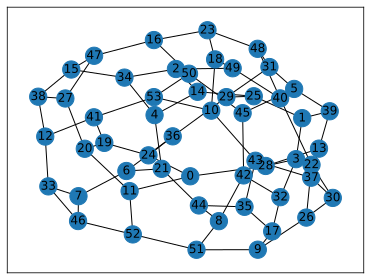

In [47]:
import networkx as nx

reg = 3
n = 54
seed = 666
G = nx.random_regular_graph(reg, n, seed=seed)
display(nx.draw_networkx(G))
print()
print(nx.to_dict_of_lists(G))
print()
print(nx.nx_pydot.graphviz_layout(G))
# terms = {(i, j): 1 for i, j in G.edges}

#Quimb has a built in QAOA circuit ansatz, which takes the dict of couplings to weights,
#and also the beta and gamma parameters describing gate rotations:
#Questions to ask: why betas and gamas are parameters for the QAOA, learn about QAOA

# p = 4
# gammas = qu.randn(p)
# betas = qu.randn(p)
# circ_ex = qtn.circ_qaoa(terms, p, gammas, betas)
# #Let's look at the generated circuit graph
# circ_ex.psi.draw(color=['PSI0', 'H', 'RZZ', 'RX'])


It is only for the zero qubit

In [50]:
print(G.edges()), edge

[(26, 30), (26, 22), (26, 9), (30, 22), (30, 37), (10, 43), (10, 53), (10, 18), (43, 35), (43, 37), (16, 47), (16, 23), (16, 50), (47, 27), (47, 15), (22, 40), (9, 17), (9, 51), (17, 32), (17, 35), (35, 44), (44, 8), (44, 21), (5, 39), (5, 45), (5, 31), (39, 1), (39, 13), (13, 28), (13, 37), (28, 3), (28, 0), (19, 41), (19, 20), (19, 24), (41, 53), (41, 12), (2, 34), (2, 49), (2, 14), (34, 4), (34, 15), (29, 36), (29, 25), (29, 31), (36, 6), (36, 24), (46, 52), (46, 7), (46, 33), (52, 51), (52, 11), (12, 38), (12, 33), (38, 27), (38, 15), (4, 21), (4, 14), (27, 20), (25, 1), (25, 14), (42, 45), (42, 8), (42, 32), (45, 50), (18, 23), (18, 49), (23, 48), (51, 8), (6, 21), (6, 7), (3, 1), (3, 32), (31, 48), (33, 7), (40, 49), (40, 48), (20, 11), (11, 0), (53, 50), (0, 24)]


NameError: name 'edge' is not defined

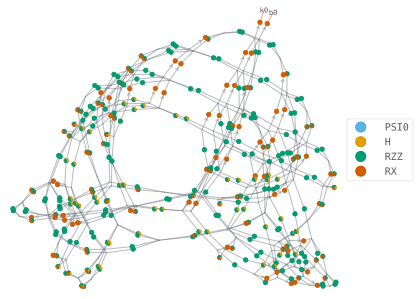

In [21]:
circ_ex.get_rdm_lightcone_simplified([0]).draw(color=['PSI0', 'H', 'RZZ', 'RX'], highlight_inds=['k0', 'b0'])


##### Now before we compute the QAOA energy we first have to rehease it or we can say we have to find the contraction widths and costs of each energy term to check they are not too big. These paths found will be cached by the ReusableHyperOptimizer for the actual computation later

In [22]:
import tqdm

ZZ = qu.pauli('Z') & qu.pauli('Z')

local_exp_rehs = [
    circ_ex.local_expectation_rehearse(weight * ZZ, edge, optimize=opt)
    for edge, weight in tqdm.tqdm(list(terms.items()))
]

100%|██████████| 81/81 [1:04:04<00:00, 47.47s/it]


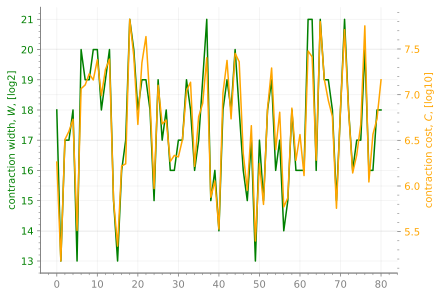

In [23]:
import matplotlib.pyplot as plt

with plt.style.context(qu.NEUTRAL_STYLE):
    fig, ax1 = plt.subplots()
    ax1.plot([rehs['W'] for rehs in local_exp_rehs], color='green')
    ax1.set_ylabel('contraction width, $W$, [log2]', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    ax2 = ax1.twinx()
    ax2.plot([rehs['C'] for rehs in local_exp_rehs], color='orange')
    ax2.set_ylabel('contraction cost, $C$, [log10]', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

In [25]:
def energy(x):
  p = len(x)//2
  gammas = x[:p]
  betas = x[p:]
  circ = qtn.circ_qaoa(terms, p, gammas, betas)

  ZZ = qu.pauli('Z') & qu.pauli('Z')

  ens = [
      circ.local_expectation(weight * ZZ, optimize = opt, backend = "jax")
      for edge, weight in terms.items()
  ]

  return sum(ens).real


In [ ]:
#To set up the bounds and parameters and the using the optimizer object itself rather than
#The actial object of the local expectation
def energy(x):
    p = len(x) // 2
    gammas = x[:p]
    betas = x[p:]
    circ = qtn.circ_qaoa(terms, p, gammas, betas)

    ZZ = qu.pauli('Z') & qu.pauli('Z')

    ens = [
        circ.local_expectation(weight * ZZ, edge, optimize=opt, backend="jax")
        for edge, weight in terms.items()
    ]

    return sum(ens).real